In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf
import sys

az.rcParams["plot.max_subplots"] = 80

First, load the output of our inference as an arviz InferenceData object:

In [2]:
data = az.from_netcdf("baseline.cdf")
az.summary(data)

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
R20,0.294,0.070,0.163,0.420,0.004,0.003,357.0,400.0,NaN
alpha,-3.775,0.329,-4.400,-3.149,0.022,0.016,227.0,180.0,NaN
bq,2.349,1.108,0.625,4.664,0.062,0.050,370.0,237.0,NaN
kappa,2.329,1.120,0.309,4.253,0.064,0.045,319.0,328.0,NaN
logR20,-0.544,0.102,-0.736,-0.339,0.005,0.004,357.0,400.0,NaN
log_dmMax,1.034,0.256,0.619,1.475,0.017,0.012,216.0,270.0,NaN
log_dmMin,-0.321,0.339,-0.866,0.317,0.016,0.012,429.0,275.0,NaN
log_f_peak,-2.635,0.245,-2.997,-2.216,0.014,0.010,253.0,233.0,NaN
logsig_chi,-0.718,0.122,-0.961,-0.530,0.007,0.005,361.0,227.0,NaN
mMax,76.746,10.846,57.373,98.582,0.547,0.393,372.0,224.0,NaN


The contents of this file are the following:

| Parameter | Description |
| :-------- | :---------- |
| `mu_chi` | Mean of the $\chi_\mathrm{eff}$ distribution |
| `logsig_chi` | Log10 of the standard deviation of the $\chi_\mathrm{eff}$ distribution |
| `bq` | Power-law index on the conditional secondary mass distribution $p(m_2\|m_1)$|
| `min_log_neff` | Log10 of the minimum number of effective samples (taken across events) for the proposed hyperparameter |
| `nEff_inj_per_event` | The effective number of found injections per observed event at the proposed hyperparameter (should be $\gg 4$) |

Next, plot our various chains to inspect convergence:

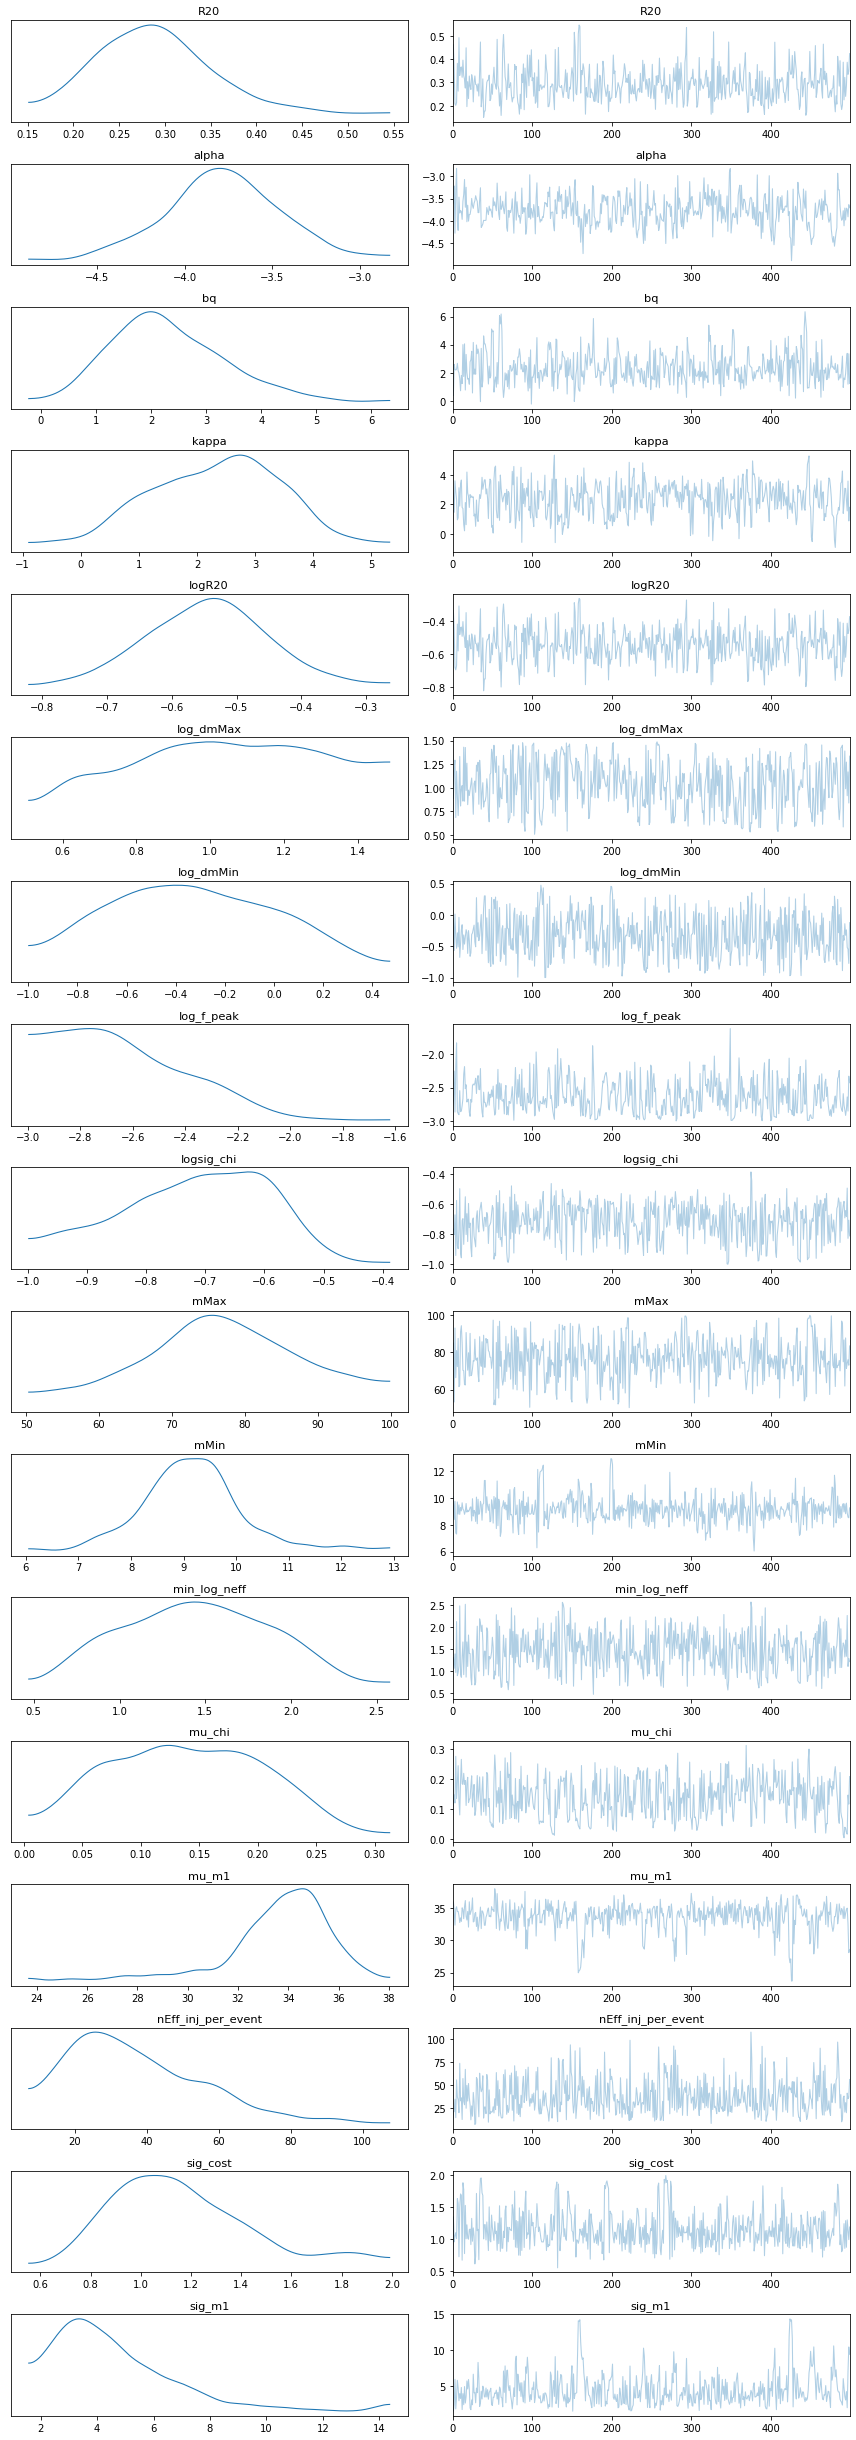

In [3]:
az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

Let's make a corner plot showing posteriors on our parameters:

In [3]:
stacked_samples = data.posterior.stack(draws=("chain", "draw"))

fig = plt.figure(figsize=(12,10))
toPlot = {
    "alpha":{"data":stacked_samples.alpha,"plot_bounds":(-6,-2),"label":r"$\alpha$"},
    "mMin":{"data":stacked_samples.mMin,"plot_bounds":(5,15),"label":r"$m_\mathrm{min}$"},
    "mMax":{"data":stacked_samples.mMax,"plot_bounds":(50,100),"label":r"$m_\mathrm{max}$"},
    "dmMin":{"data":stacked_samples.log_dmMin,"plot_bounds":(-1,0.5),"label":r"$\log dm_\mathrm{min}$"},
    "dmMax":{"data":stacked_samples.log_dmMax,"plot_bounds":(0.5,1.5),"label":r"$\log dm_\mathrm{max}$"},
    "mu_m":{"data":stacked_samples.mu_m1,"plot_bounds":(25,40),"label":r"$\mu_m$"},
    "sig_m":{"data":stacked_samples.sig_m1,"plot_bounds":(1.5,10),"label":r"$\sigma_m$"},
    "kappa":{"data":stacked_samples.kappa,"plot_bounds":(-1,6),"label":r"$\kappa$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,150),"label":r"$N_\mathrm{inj}$/event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$"}
}
plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

NameError: name 'data' is not defined

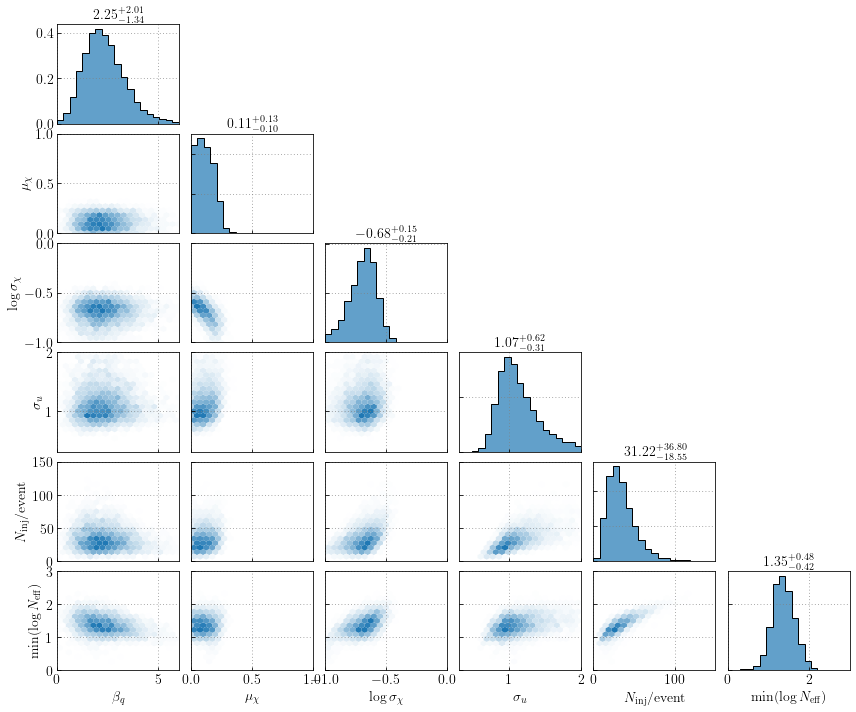

In [5]:
stacked_samples = data.posterior.stack(draws=("chain", "draw"))

fig = plt.figure(figsize=(12,10))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(0,6),"label":r"$\beta_q$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(0,1),"label":r"$\mu_\chi$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1,0),"label":r"$\log\sigma_\chi$"},
    "sig_cost":{"data":stacked_samples.sig_cost,"plot_bounds":(0.3,2),"label":r"$\sigma_u$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,150),"label":r"$N_\mathrm{inj}$/event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$"}
}
plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

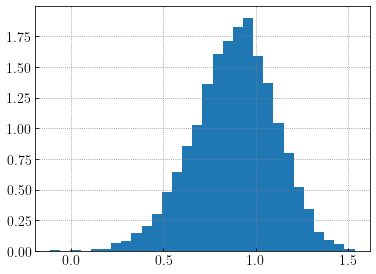

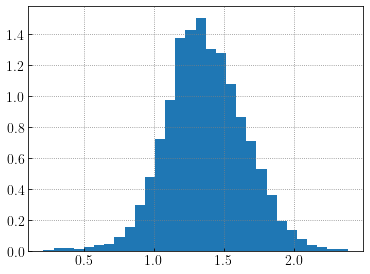

In [6]:
fig,ax = plt.subplots()
ax.hist(np.log10(stacked_samples.nEff_inj_per_event/4.),density=True,bins=30)
plt.show()

fig,ax = plt.subplots()
ax.hist(stacked_samples.min_log_neff,density=True,bins=30)
plt.show()

Finally, let's make a "trace plot" showing the set of $\chi_\mathrm{eff}$ distributions corresponding to the above samples:

In [4]:
def gaussian(samples,mu,sigma,lowCutoff,highCutoff):
    
    """
    Function defining the probability density due to a truncated Gaussian
    """
    
    a = (lowCutoff-mu)/np.sqrt(2*sigma**2)
    b = (highCutoff-mu)/np.sqrt(2*sigma**2)
    norm = np.sqrt(sigma**2*np.pi/2)*(-erf(a) + erf(b))
    return np.exp(-(samples-mu)**2/(2.*sigma**2))/norm

def massModel(m1,alpha,mu_m1,sig_m1,f_peak,mMax,mMin,dmMax,dmMin):

    p_m1_pl = (1.+alpha)*m1**(alpha)/(120.**(1.+alpha) - 2.**(1.+alpha))
    p_m1_peak = np.exp(-(m1-mu_m1)**2/(2.*sig_m1**2))/np.sqrt(2.*np.pi*sig_m1**2)

    low_filter = np.exp(-(m1-mMin)**2/(2.*dmMin**2))
    low_filter = np.where(m1<mMin,low_filter,1.)
    high_filter = np.exp(-(m1-mMax)**2/(2.*dmMax**2))
    high_filter = np.where(m1>mMax,high_filter,1.)

    return (f_peak*p_m1_peak + (1.-f_peak)*p_m1_pl)*low_filter*high_filter

In [5]:
#data = az.from_netcdf("ref.cdf")
samps = data.posterior.stack(draws=("chain", "draw"))

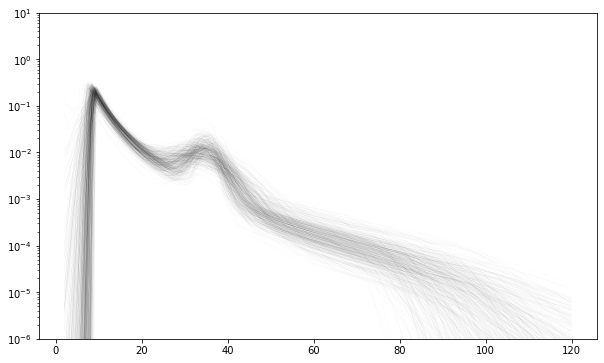

In [6]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
for i in range(samps.alpha.size):
    
    p_m = massModel(m_grid,samps.alpha.values[i],samps.mu_m1.values[i],samps.sig_m1.values[i],
                    10.**samps.log_f_peak.values[i],samps.mMax.values[i],samps.mMin.values[i],
                    10.**samps.log_dmMax.values[i],10.**samps.log_dmMin.values[i])    
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='black',lw=0.1,alpha=0.1)
    
ax.set_yscale('log')
ax.set_ylim(1e-6,1e1)
plt.show()

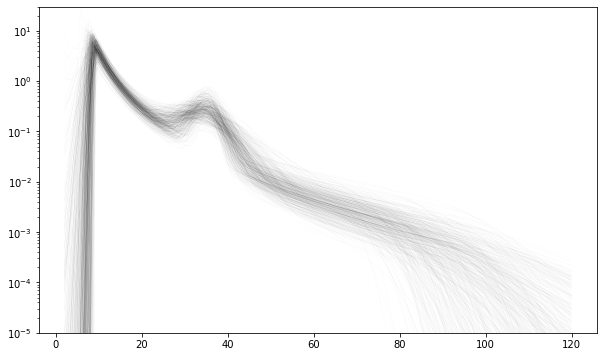

In [10]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)
for i in range(samps.alpha.size):
    p_m = massModel(m_grid,samps.alpha.values[i],samps.mu_m1.values[i],samps.sig_m1.values[i],
                    10.**samps.log_f_peak.values[i],samps.mMax.values[i],samps.mMin.values[i],
                    10.**samps.log_dmMax.values[i],10.**samps.log_dmMin.values[i])
    p_m_norm = massModel(20.,samps.alpha.values[i],samps.mu_m1.values[i],samps.sig_m1.values[i],
                    10.**samps.log_f_peak.values[i],samps.mMax.values[i],samps.mMin.values[i],
                    10.**samps.log_dmMax.values[i],10.**samps.log_dmMin.values[i])
    ax.plot(m_grid,samps.R20.values[i]*p_m/p_m_norm,color='black',lw=0.1,alpha=0.1)
ax.set_yscale('log')
ax.set_ylim(1e-5,30)
plt.show()

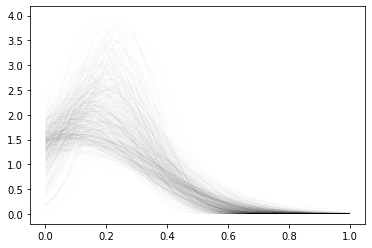

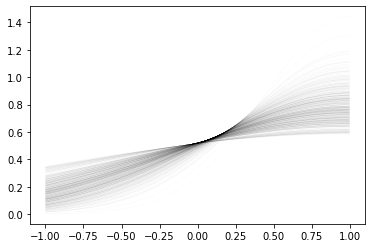

In [9]:
fig,ax = plt.subplots()
grid = np.linspace(0,1,1000)
for i in range(samps.mu_chi.size):
    
    p_chi = gaussian(grid,samps.mu_chi.values[i],10.**samps.logsig_chi.values[i],-1,1)
    ax.plot(grid,p_chi,color='black',lw=0.1,alpha=0.1)
plt.show()

fig,ax = plt.subplots()
grid = np.linspace(-1,1,1000)
for i in range(samps.mu_chi.size):
    
    #p_cost = gaussian(grid,samps.mu_cost.values[i],samps.sig_cost.values[i],-1,1)
    p_cost = gaussian(grid,1.,samps.sig_cost.values[i],-1,1)

    ax.plot(grid,p_cost,color='black',lw=0.1,alpha=0.1)
plt.show()